In [109]:

import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
#directions
up = 0
right = 1
down = 2
left = 3
actions = ["up","right", "down", "left"]

num_actions = 4

In [2]:
env = gym.make('FrozenLake-v0')


In [3]:
#initialize Q table
Q = np.zeros([env.observation_space.n, env.action_space.n])

#set learning experiene
lr = 0.8
y = 0.95

num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

In [4]:
print "Final Q-Table Values"
print Q

Final Q-Table Values
[[  1.82522421e-01   2.50482872e-03   2.04927739e-03   1.53850997e-03]
 [  5.96534808e-05   1.87211736e-03   5.30417266e-05   1.48121785e-01]
 [  1.01025688e-01   9.06207788e-04   1.70956702e-03   1.62459027e-03]
 [  9.41986596e-05   4.04423549e-04   4.43301568e-04   1.61026792e-03]
 [  1.75256540e-01   9.50175946e-05   2.91331305e-04   1.32922876e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.07344024e-04   4.11237007e-06   9.94972434e-05   2.90101231e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  6.38386259e-04   1.14890753e-06   8.43279175e-04   6.56353451e-01]
 [  5.23326989e-04   3.03898216e-01   2.46366688e-04   9.45371016e-04]
 [  3.23853079e-01   1.00533746e-04   9.19219717e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   4.59170297e-01   0

In [5]:
# Now try hw 4b

from scipy.io import loadmat

def load(fname):
    matdict = loadmat(fname)
    try:
        fl = np.array(matdict["FL"])
        return fl
    except:
        flcost = np.array(matdict["FLCost"])
        return flcost


FL = load("matlab_FL.mat")
FL_cost = load("FLCost.mat")









In [6]:
n = FL_cost.shape[0]

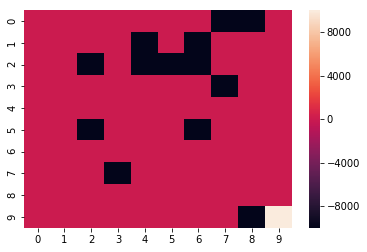

In [7]:
from seaborn import heatmap
heatmap(FL_cost)

In [107]:
def get_next_action(current_state, action):
#     probability_distribution = FL[current_state[0], current_state[1], action, :]
#     print probability_distribution
#     random_num = random.random()
# #     print random_num
#     curr= 0
#     for i in range(num_actions):
#         if random_num < curr + probability_distribution[i]:
#             return i
#         curr = curr + probability_distribution[i]   
    return (np.random.multinomial(1, FL[current_state[0], current_state[1], action, :])).argmax()

def get_next_state(current_state, action):
    if action == left:
        return (current_state[0], max(0, current_state[1]-1))
    if action == right:
        return (current_state[0], min(n-1, current_state[1]+1))
    if action == down:
        return (min(n-1, current_state[0]+1),  current_state[1])
    if action == up:
        return (max(0, current_state[0]-1),  current_state[1])
    
def take_action(current_state, action):
    next_action = get_next_action(current_state, action)
    next_state = get_next_state(current_state, next_action)
    return next_action, next_state, FL_cost[next_state[0], next_state[1]]


   


In [10]:
print(get_next_state((8, 8), right)  )

(8, 9)


In [102]:
a = get_next_action((0, 1), up)
print a


[ 0.          0.13889881  0.18007011  0.68103107]
3


In [113]:

#implement Q learning
lr = 0.1 #learning rate
gamma = 1 # discount factor
action_epsilon = 0.95
num_episodes = 2000 #number of iterations

Q = np.random.rand(n, n,num_actions) * 0.01

# print Q

start_state = (0,0)
# current_state = (0,0)
end_state = (n-1,n-1)
rList = []

# score = []
for i in range(num_episodes):
    start_time = time.time()
    print "Now", i,
    current_state = (0,0)
    rAll = 0
    d = False
    j = 0
#     while current_state != end_state:
    while j < 100:
        j+=1
        #get the next action based on some probability 10% take random action, 90% take best action
        action_random_value = random.random()
        if action_random_value < action_epsilon:
            action = np.argmax(Q[current_state[0],current_state[1],:])
        else:
            action = random.randint(0,3)
        
        actual_next_action, next_state, reward = take_action(current_state, action)
#         print next_state, reward
        current_Q = Q[current_state[0],current_state[1], action]
#         print "current Q", current_Q
#         print "current Q", Q[current_state[0],current_state[1], action] 
        Q[current_state[0],current_state[1], action] = current_Q +  lr*(reward + gamma * (np.max(Q[next_state[0], next_state[1],:]) - current_Q))
#         print "current_state", current_state, "action", actions[action], "actual_action", actions[actual_next_action]
#         print "got reward", reward
#         print "added ", lr*(reward + y* (np.max(Q[next_state[0], next_state[1],:]) - current_Q))
#         print "updated Q", Q[current_state[0],current_state[1], action]
        score = [current_state, Q[current_state[0],current_state[1], action], action]
        current_state = next_state
#         rAll += reward
        if current_state == end_state:
            print "reached end"
            break
    print("elapsed time, ", time.time() - start_time)
#     rList.append(rAll)
            
        #score = Q[current_state[0],current_state[1], action]
#     print score[0],score[1] ,actions[score[2]]
    
      

 Now 0 ('elapsed time, ', 0.008483171463012695)
Now 1 ('elapsed time, ', 0.0050051212310791016)
Now 2 ('elapsed time, ', 0.0052449703216552734)
Now 3 ('elapsed time, ', 0.0057179927825927734)
Now 4 ('elapsed time, ', 0.004849910736083984)
Now 5 reached end
('elapsed time, ', 0.004684925079345703)
Now 6 ('elapsed time, ', 0.004806041717529297)
Now 7 ('elapsed time, ', 0.004960060119628906)
Now 8 ('elapsed time, ', 0.004964113235473633)
Now 9 ('elapsed time, ', 0.00480198860168457)
Now 10 reached end
('elapsed time, ', 0.004475116729736328)
Now 11 ('elapsed time, ', 0.004892110824584961)
Now 12 ('elapsed time, ', 0.0048558712005615234)
Now 13 ('elapsed time, ', 0.00527191162109375)
Now 14 ('elapsed time, ', 0.0059299468994140625)
Now 15 ('elapsed time, ', 0.004854917526245117)
Now 16 ('elapsed time, ', 0.004945039749145508)
Now 17 ('elapsed time, ', 0.006788969039916992)
Now 18 ('elapsed time, ', 0.006215095520019531)
Now 19 ('elapsed time, ', 0.00533604621887207)
Now 20 ('elapsed time, 

Now 175 ('elapsed time, ', 0.02193903923034668)
Now 176 ('elapsed time, ', 0.008630037307739258)
Now 177 ('elapsed time, ', 0.010087966918945312)
Now 178 ('elapsed time, ', 0.006932973861694336)
Now 179 ('elapsed time, ', 0.016247034072875977)
Now 180 ('elapsed time, ', 0.007869958877563477)
Now 181 ('elapsed time, ', 0.006162881851196289)
Now 182 ('elapsed time, ', 0.007266044616699219)
Now 183 ('elapsed time, ', 0.005256175994873047)
Now 184 reached end
('elapsed time, ', 0.0031280517578125)
Now 185 ('elapsed time, ', 0.005208015441894531)
Now 186 ('elapsed time, ', 0.005421876907348633)
Now 187 ('elapsed time, ', 0.0072209835052490234)
Now 188 ('elapsed time, ', 0.006564140319824219)
Now 189 ('elapsed time, ', 0.01307988166809082)
Now 190 ('elapsed time, ', 0.02277398109436035)
Now 191 ('elapsed time, ', 0.006698131561279297)
Now 192 reached end
('elapsed time, ', 0.0055201053619384766)
Now 193 ('elapsed time, ', 0.00736689567565918)
Now 194 reached end
('elapsed time, ', 0.00346279

Now 340 ('elapsed time, ', 0.011355161666870117)
Now 341 ('elapsed time, ', 0.008221864700317383)
Now 342 ('elapsed time, ', 0.008829116821289062)
Now 343 ('elapsed time, ', 0.0046100616455078125)
Now 344 reached end
('elapsed time, ', 0.011311054229736328)
Now 345 reached end
('elapsed time, ', 0.00444483757019043)
Now 346 ('elapsed time, ', 0.010758161544799805)
Now 347 ('elapsed time, ', 0.004499912261962891)
Now 348 ('elapsed time, ', 0.005769014358520508)
Now 349 ('elapsed time, ', 0.005474090576171875)
Now 350 ('elapsed time, ', 0.020125150680541992)
Now 351 ('elapsed time, ', 0.01489400863647461)
Now 352 ('elapsed time, ', 0.015411853790283203)
Now 353 ('elapsed time, ', 0.0057599544525146484)
Now 354 ('elapsed time, ', 0.008646011352539062)
Now 355 reached end
('elapsed time, ', 0.0042171478271484375)
Now 356 ('elapsed time, ', 0.01244807243347168)
Now 357 ('elapsed time, ', 0.0059070587158203125)
Now 358 ('elapsed time, ', 0.009213924407958984)
Now 359 reached end
('elapsed ti

Now 541 ('elapsed time, ', 0.005159854888916016)
Now 542 reached end
('elapsed time, ', 0.005429983139038086)
Now 543 ('elapsed time, ', 0.004495859146118164)
Now 544 ('elapsed time, ', 0.015456914901733398)
Now 545 ('elapsed time, ', 0.005930900573730469)
Now 546 ('elapsed time, ', 0.026154041290283203)
Now 547 ('elapsed time, ', 0.01682305335998535)
Now 548 ('elapsed time, ', 0.013331174850463867)
Now 549 ('elapsed time, ', 0.009109973907470703)
Now 550 reached end
('elapsed time, ', 0.007825851440429688)
Now 551 reached end
('elapsed time, ', 0.014139175415039062)
Now 552 reached end
('elapsed time, ', 0.00243377685546875)
Now 553 reached end
('elapsed time, ', 0.009389877319335938)
Now 554 ('elapsed time, ', 0.006327152252197266)
Now 555 ('elapsed time, ', 0.016193866729736328)
Now 556 ('elapsed time, ', 0.007171154022216797)
Now 557 ('elapsed time, ', 0.007681846618652344)
Now 558 reached end
('elapsed time, ', 0.0035669803619384766)
Now 559 reached end
('elapsed time, ', 0.009905

Now 713 ('elapsed time, ', 0.008100032806396484)
Now 714 ('elapsed time, ', 0.0049648284912109375)
Now 715 ('elapsed time, ', 0.020245075225830078)
Now 716 reached end
('elapsed time, ', 0.012866020202636719)
Now 717 ('elapsed time, ', 0.004937171936035156)
Now 718 reached end
('elapsed time, ', 0.00836801528930664)
Now 719 reached end
('elapsed time, ', 0.00580906867980957)
Now 720 ('elapsed time, ', 0.0060579776763916016)
Now 721 ('elapsed time, ', 0.0049591064453125)
Now 722 ('elapsed time, ', 0.005609035491943359)
Now 723 ('elapsed time, ', 0.005856037139892578)
Now 724 ('elapsed time, ', 0.005914926528930664)
Now 725 reached end
('elapsed time, ', 0.003997087478637695)
Now 726 reached end
('elapsed time, ', 0.003194093704223633)
Now 727 ('elapsed time, ', 0.008265972137451172)
Now 728 reached end
('elapsed time, ', 0.002315044403076172)
Now 729 ('elapsed time, ', 0.0052700042724609375)
Now 730 ('elapsed time, ', 0.005427122116088867)
Now 731 ('elapsed time, ', 0.005109071731567383

Now 891 ('elapsed time, ', 0.005624055862426758)
Now 892 ('elapsed time, ', 0.005465984344482422)
Now 893 reached end
('elapsed time, ', 0.0033330917358398438)
Now 894 reached end
('elapsed time, ', 0.00970005989074707)
Now 895 ('elapsed time, ', 0.015949010848999023)
Now 896 ('elapsed time, ', 0.004564046859741211)
Now 897 ('elapsed time, ', 0.007555961608886719)
Now 898 ('elapsed time, ', 0.0066509246826171875)
Now 899 ('elapsed time, ', 0.005700111389160156)
Now 900 ('elapsed time, ', 0.01514887809753418)
Now 901 ('elapsed time, ', 0.007645130157470703)
Now 902 reached end
('elapsed time, ', 0.0026938915252685547)
Now 903 ('elapsed time, ', 0.07427000999450684)
Now 904 ('elapsed time, ', 0.01058506965637207)
Now 905 ('elapsed time, ', 0.006680011749267578)
Now 906 ('elapsed time, ', 0.007596015930175781)
Now 907 ('elapsed time, ', 0.006102085113525391)
Now 908 ('elapsed time, ', 0.006094932556152344)
Now 909 ('elapsed time, ', 0.005650043487548828)
Now 910 ('elapsed time, ', 0.01255

Now 1066 ('elapsed time, ', 0.006783962249755859)
Now 1067 ('elapsed time, ', 0.006089925765991211)
Now 1068 reached end
('elapsed time, ', 0.00512385368347168)
Now 1069 ('elapsed time, ', 0.004786968231201172)
Now 1070 ('elapsed time, ', 0.005196809768676758)
Now 1071 ('elapsed time, ', 0.005257844924926758)
Now 1072 ('elapsed time, ', 0.005151033401489258)
Now 1073 reached end
('elapsed time, ', 0.005533933639526367)
Now 1074 ('elapsed time, ', 0.0060291290283203125)
Now 1075 ('elapsed time, ', 0.005303144454956055)
Now 1076 reached end
('elapsed time, ', 0.006018161773681641)
Now 1077 ('elapsed time, ', 0.005137920379638672)
Now 1078 ('elapsed time, ', 0.005133867263793945)
Now 1079 ('elapsed time, ', 0.006796836853027344)
Now 1080 ('elapsed time, ', 0.005872011184692383)
Now 1081 ('elapsed time, ', 0.004967927932739258)
Now 1082 ('elapsed time, ', 0.005383968353271484)
Now 1083 ('elapsed time, ', 0.006777048110961914)
Now 1084 ('elapsed time, ', 0.006217002868652344)
Now 1085 ('ela

Now 1224 ('elapsed time, ', 0.0046808719635009766)
Now 1225 ('elapsed time, ', 0.006073951721191406)
Now 1226 reached end
('elapsed time, ', 0.004817008972167969)
Now 1227 ('elapsed time, ', 0.004491090774536133)
Now 1228 reached end
('elapsed time, ', 0.004079103469848633)
Now 1229 reached end
('elapsed time, ', 0.0026400089263916016)
Now 1230 ('elapsed time, ', 0.004355907440185547)
Now 1231 ('elapsed time, ', 0.008462905883789062)
Now 1232 ('elapsed time, ', 0.007798910140991211)
Now 1233 ('elapsed time, ', 0.00775599479675293)
Now 1234 reached end
('elapsed time, ', 0.00345611572265625)
Now 1235 ('elapsed time, ', 0.009145021438598633)
Now 1236 reached end
('elapsed time, ', 0.010856151580810547)
Now 1237 ('elapsed time, ', 0.007298946380615234)
Now 1238 ('elapsed time, ', 0.006499052047729492)
Now 1239 ('elapsed time, ', 0.006162166595458984)
Now 1240 ('elapsed time, ', 0.004461050033569336)
Now 1241 ('elapsed time, ', 0.006957054138183594)
Now 1242 ('elapsed time, ', 0.0050830841

Now 1402 ('elapsed time, ', 0.004374027252197266)
Now 1403 reached end
('elapsed time, ', 0.0023670196533203125)
Now 1404 ('elapsed time, ', 0.004413127899169922)
Now 1405 ('elapsed time, ', 0.0055730342864990234)
Now 1406 ('elapsed time, ', 0.0053250789642333984)
Now 1407 reached end
('elapsed time, ', 0.004003047943115234)
Now 1408 ('elapsed time, ', 0.0043201446533203125)
Now 1409 ('elapsed time, ', 0.00454401969909668)
Now 1410 ('elapsed time, ', 0.004319906234741211)
Now 1411 ('elapsed time, ', 0.007596015930175781)
Now 1412 ('elapsed time, ', 0.005465984344482422)
Now 1413 reached end
('elapsed time, ', 0.005738019943237305)
Now 1414 ('elapsed time, ', 0.0043370723724365234)
Now 1415 reached end
('elapsed time, ', 0.0025451183319091797)
Now 1416 ('elapsed time, ', 0.004436016082763672)
Now 1417 ('elapsed time, ', 0.0044040679931640625)
Now 1418 ('elapsed time, ', 0.004374027252197266)
Now 1419 reached end
('elapsed time, ', 0.003721952438354492)
Now 1420 ('elapsed time, ', 0.0061

Now 1566 ('elapsed time, ', 0.008074045181274414)
Now 1567 ('elapsed time, ', 0.0058689117431640625)
Now 1568 ('elapsed time, ', 0.005751132965087891)
Now 1569 ('elapsed time, ', 0.0053369998931884766)
Now 1570 ('elapsed time, ', 0.008054971694946289)
Now 1571 reached end
('elapsed time, ', 0.0036890506744384766)
Now 1572 reached end
('elapsed time, ', 0.0038309097290039062)
Now 1573 ('elapsed time, ', 0.004988908767700195)
Now 1574 ('elapsed time, ', 0.0053081512451171875)
Now 1575 ('elapsed time, ', 0.004375934600830078)
Now 1576 ('elapsed time, ', 0.004441976547241211)
Now 1577 ('elapsed time, ', 0.006003856658935547)
Now 1578 ('elapsed time, ', 0.005570888519287109)
Now 1579 ('elapsed time, ', 0.005324125289916992)
Now 1580 ('elapsed time, ', 0.004457950592041016)
Now 1581 ('elapsed time, ', 0.006143093109130859)
Now 1582 ('elapsed time, ', 0.004334211349487305)
Now 1583 ('elapsed time, ', 0.004717826843261719)
Now 1584 ('elapsed time, ', 0.004559993743896484)
Now 1585 reached end


Now 1740 ('elapsed time, ', 0.007235050201416016)
Now 1741 ('elapsed time, ', 0.006697893142700195)
Now 1742 ('elapsed time, ', 0.004951953887939453)
Now 1743 ('elapsed time, ', 0.00519108772277832)
Now 1744 ('elapsed time, ', 0.00568389892578125)
Now 1745 ('elapsed time, ', 0.0058460235595703125)
Now 1746 ('elapsed time, ', 0.00524592399597168)
Now 1747 ('elapsed time, ', 0.005039215087890625)
Now 1748 reached end
('elapsed time, ', 0.00601506233215332)
Now 1749 ('elapsed time, ', 0.007960081100463867)
Now 1750 reached end
('elapsed time, ', 0.0045680999755859375)
Now 1751 ('elapsed time, ', 0.0075528621673583984)
Now 1752 reached end
('elapsed time, ', 0.004731893539428711)
Now 1753 reached end
('elapsed time, ', 0.005970954895019531)
Now 1754 ('elapsed time, ', 0.00745701789855957)
Now 1755 ('elapsed time, ', 0.007050991058349609)
Now 1756 ('elapsed time, ', 0.00672602653503418)
Now 1757 ('elapsed time, ', 0.00601506233215332)
Now 1758 reached end
('elapsed time, ', 0.00189590454101

Now 1958 ('elapsed time, ', 0.007509946823120117)
Now 1959 ('elapsed time, ', 0.007791042327880859)
Now 1960 ('elapsed time, ', 0.0051610469818115234)
Now 1961 reached end
('elapsed time, ', 0.003712177276611328)
Now 1962 ('elapsed time, ', 0.0052640438079833984)
Now 1963 ('elapsed time, ', 0.0052318572998046875)
Now 1964 ('elapsed time, ', 0.004881143569946289)
Now 1965 reached end
('elapsed time, ', 0.005733966827392578)
Now 1966 reached end
('elapsed time, ', 0.007369041442871094)
Now 1967 ('elapsed time, ', 0.0050928592681884766)
Now 1968 ('elapsed time, ', 0.005457162857055664)
Now 1969 reached end
('elapsed time, ', 0.004749774932861328)
Now 1970 ('elapsed time, ', 0.0048520565032958984)
Now 1971 reached end
('elapsed time, ', 0.006536960601806641)
Now 1972 ('elapsed time, ', 0.005239009857177734)
Now 1973 ('elapsed time, ', 0.004935026168823242)
Now 1974 ('elapsed time, ', 0.005082130432128906)
Now 1975 ('elapsed time, ', 0.00755000114440918)
Now 1976 ('elapsed time, ', 0.005962

In [ ]:
print rList
# print "Score over time: " +  str(sum(rList)/num_episodes)

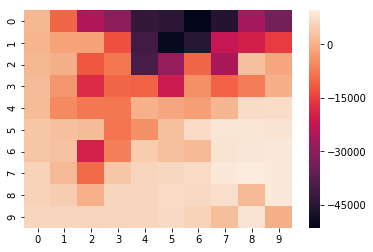

In [117]:
from matplotlib.colors import ListedColormap

heatmap(Q.max(2))


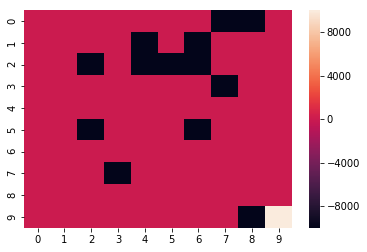

In [116]:
heatmap(FL_cost)

In [123]:
policy = Q.argmax(2)
p = np.chararray((10,10), 2)
for i in range(10):
    for j in range(10):
        p[i,j] = actions[policy[i,j]]
p

chararray([['up', 'up', 'do', 'ri', 'ri', 'up', 'up', 'ri', 'ri', 'ri'],
           ['ri', 'do', 'le', 'ri', 'le', 'le', 'do', 'do', 'up', 'ri'],
           ['up', 'ri', 'le', 'up', 'do', 'le', 'ri', 'up', 'le', 'le'],
           ['le', 'up', 'do', 'le', 'do', 'le', 'ri', 'up', 'ri', 'do'],
           ['ri', 'up', 'le', 'up', 'up', 'do', 'ri', 'up', 'le', 'up'],
           ['ri', 'up', 'ri', 'up', 'do', 'le', 'le', 'up', 'do', 'le'],
           ['ri', 'ri', 'le', 'do', 'ri', 'ri', 'do', 'ri', 'le', 'up'],
           ['do', 'up', 'ri', 'do', 'up', 'do', 'ri', 'do', 'ri', 'up'],
           ['do', 'do', 'do', 'up', 'ri', 'le', 'ri', 'up', 'up', 'ri'],
           ['do', 'ri', 'ri', 'do', 'le', 'up', 'up', 'le', 'le', 'le']],
          dtype='|S2')

In [ ]:
#test policy
start_state = (0,0)
end_state= (9,9)
current_state = (0,0)

while start_state != end_state:
    action = policy[current_state[0], current_state[1]]
    actual_next_action, next_state, _ = take_action(current_state, action)
# #         print next_state, reward
#         current_Q = Q[current_state[0],current_state[1], action]
# #         print "current Q", current_Q
# #         print "current Q", Q[current_state[0],current_state[1], action] 
#         Q[current_state[0],current_state[1], action] = current_Q +  lr*(reward + gamma * (np.max(Q[next_state[0], next_state[1],:]) - current_Q))
    print "current_state", current_state, "action", actions[action], "actual_action", actions[actual_next_action]
# #         print "got reward", reward
# #         print "added ", lr*(reward + y* (np.max(Q[next_state[0], next_state[1],:]) - current_Q))
# #         print "updated Q", Q[current_state[0],current_state[1], action]
#         score = [current_state, Q[current_state[0],current_state[1], action], action]
    current_state = next_state
    
        
#         rAll += reward
#         if current_state == end_state:
#             print "reached end"
#             break


current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action right
current_state (0, 2) action down actual_action right
current_state (0, 3) action right actual_action down
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action right
current_state (1, 5) action left actual_action up
current_state (0, 5) action up actual_action left
current_state (0, 4) action right actual_action left
current_state (0, 3) action

current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) ac

current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state 

current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_sta

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right a

current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
curre

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action do

current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action

current_state (0, 3) action right actual_action right
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action right
current_state (0, 5) action up actual_action left
current_state (0, 4) action right actual_action left
current_state (0, 3) action right actual_action right
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action left
current_state (1, 3) action right actual_action up
current_state (0, 3) action right actual_action down
current_state (1, 3) action right actual_action left
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action up
current_state (0, 3) action right actual_action right
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action left
current_state (1, 3) action right actual_action left
current_state (1, 2) action left actual_action right
c

current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) a

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_st

current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action down
current_state (5, 0) action right actual_action down
current_state (6, 0) action right actual_action right
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_sta

current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7)

current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_st

current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4)

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6)

current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action right
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action down
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action righ

current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action right
current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action right
current_state (3, 9) action down actual_action left
current_state (

current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right ac

current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) a

current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) a

current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) a

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6

current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action right
current_state (2, 1) action right a

current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9

current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action right
current_state (

current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action rig

current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action up
current_state (4, 5) action down actual_action right
current_state (4, 6) action right actual_action left
current_state (4, 5) action down actual_action down
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) a

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up act

current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4)

current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) a

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action ri

current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up a

current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action left
current_state (8, 7) ac

current_state (0, 2) action down actual_action right
current_state (0, 3) action right actual_action left
current_state (0, 2) action down actual_action down
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action down
current_state (2, 3) action up actual_action down
current_state (3, 3) action left actual_action left
current_state (3, 2) action down actual_action left
current_state (3, 1) action up actual_action left
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action up
current_state (3, 2) act

current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) actio

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6)

current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_stat

current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) acti

current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5

current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) ac

current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action 

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action up
current_state (4, 5) action down actual_action left
current_state (4, 4) action up actual_action down
current_state (5, 4) action down actual_action up
current_state (4, 4) action up actual_action up
current_state (3, 4) action dow

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action left
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action left
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action right
current_state (7, 5) 

current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8)

current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) act

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) actio

current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8,

current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action right
current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action down
current_state (3, 1) action up actual_action down
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action left
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action up
current_state (2, 0) acti

current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action right
current_state (8, 3) act

current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action down
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action right
current_state (4, 3) action up ac

current_state (2, 2) action left actual_action up
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action left
current_state (1, 2) action left actual_action down
current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action down
current_state (3, 1) action up actual_action right
current_state (3, 2) action down actual_action down
current_state (4, 2) action left actual_action left
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8

current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action 

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down a

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action rig

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action

current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8

current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action u

current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action up
current_state (6, 2) action left actual_action right
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action right
current_state (6, 3) action down actual_action up
current_state (5, 3) action up actual_action left
current_state (5, 2) action right actual_action left
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action up
current_state (6, 2

current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action right
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action up
current_state (0, 3) action right actual_action right
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action right
current_state (0, 5) action up actual_action down
current_state (1, 5) action left actual_action up
current_state (0, 5) action up actual_action left
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action left
current_state (1, 3) action right actual_action up
current_state (0, 3) action right actual_action right
current_state (0, 4) action right actual_action down
current_stat

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7)

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) 

current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) act

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up

current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) acti

current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) actio

current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action 

current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) act

current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) ac

current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state 

current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action down
current_state

current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1)

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6,

current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action down
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action right
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up 

current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up a

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state 

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8,

current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state

current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) actio

current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9

current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action left
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_st

current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down 

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) 

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action 

current_state (2, 8) action left actual_action up
current_state (1, 8) action up actual_action down
current_state (2, 8) action left actual_action down
current_state (3, 8) action right actual_action down
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action left
current_state (4, 7) action up actual_action right
current_state (4, 8) action left actual_action right
current_state (4, 9) action up actual_action left
current_state (4, 8) action left actual_action left
current_state (4, 7) action up actual_action right
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) a

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up ac

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6)

current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state 

current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action up
current_state (4, 4) action up actual_action down
current_state (5, 4) action down actual_action right
current_state (5, 5) action lef

current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action up
current_state (2, 8) action left actual_action right
current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action up
current_state (1, 8) action up actual_action down
current_state (2, 8) action left actual_action right
current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action down
current_state (3, 8) action right actual_action up
current_state (2, 8) action left actual_action right
current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action right
current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action down
current_state (3, 8) action right actual_action down
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_stat

current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action down
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action 

current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) acti

current_state (4, 8) action left actual_action left
current_state (4, 7) action up actual_action down
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action down
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action left
current_state (3, 7) action up actual_action left
current_state (3, 6) action right actual_action up
current_state (2, 6) action right actual_action right
current_state (2, 7) action up actual_action down
current_state (3, 7) action up actual_action left
current_state (3, 6) action right actual_action right
current_state (3, 7) action up actual_action down
current_state (4, 7) action up actual_action down
current_state (5, 7) action up actual_action right
current_state (5, 8) action dow

current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) 

current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action up
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up

current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) a

current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action 

current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state 

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) acti

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) acti

current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) a

current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) a

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actu

current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left ac

current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action up
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action right
current_state (7, 3) a

current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action u

current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action right
current_state (1, 2) action left actual_action left
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action right
current_state (0, 2) action down actual_action right
current_state (0, 3) action right actual_action left
current_state (0, 2) action down actual_action down
current_state (1, 2) action left actual_action left
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action down
current_state (1, 1) action down actual_action right
current_state (1, 2) action left actual_action right
current_state (1

current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actu

current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action right
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action down
current_state (4, 8) acti

current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6

current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5

current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action left
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action right
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state 

current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 

current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action left
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action right
current_state (3, 3) action left act

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 

current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) act

current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (

current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9,

current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) a

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current

current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action down
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action up
current_state (4, 0) a

current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9,

current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action 

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action left
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action left
current_state (3, 1) action u

current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) a

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4

current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5)

current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5)

current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5)

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action 

current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (

current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action left
current_state (4, 1) action up actual_action left
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action right
current_state (4, 

current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action right
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action down
current_state (

current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9,

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) act

current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action up
current_state (4, 5) action down actual_action down
current_state (5, 5) action le

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) ac

current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action r

current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action down
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action right
current_state (5, 2) action right actual_action left
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) 

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actu

current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action d

current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_s

current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action up
current_state (4, 4) action up actual_action up
current_state (3, 4) action down actual_action up
current_state (2, 4) action down actual_action up
current_state (1, 4) action left actual_action left
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action left
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action left
current_state (0, 3) action right actual_action left
current_state (0, 2) action down actual_action left
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) act

current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state 

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action

current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) a

current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) act

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action up
current_state (4, 6) action right actual_action right
current_state (4, 7) action up actual_action down
current_state (5, 7) action up actual_action down
current_state (6, 7

current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action 

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action right
current_state (5, 4) a

current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) acti

current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 

current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action right
current_state (1, 2) action left actual_action up
current_state (0, 2) action down actual_action down
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action down
current_state (2, 3) action up actual_action down
current_state (3, 3) action left actual_action down
current_state (4, 3) actio

current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9,

current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action up
current_state (5, 2) action right actual_action up
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action right
current_state (5, 4) 

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action up
current_state (4, 5) action down actual_action down
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action 

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) actio

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) 

current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action d

current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) actio

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action up act

current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) 

current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) 

current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) acti

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5

current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actu

current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) act

current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action right
current_state (1, 2) action left actual_action down
current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action up
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action left
current_state (2, 0) ac

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) a

current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) actio

current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_sta

current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) act

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) actio

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action up
current_state (7, 2) action right 

current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action l

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) acti

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action left
current_state (7, 0)

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action 

current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_stat

current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (

current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) act

current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) ac

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) a

current_state (4, 3) action up actual_action left
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action up
current_state (6, 2) action left actual_action left
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action right
current_state (7,

current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action left
current_state (8, 0) action

current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7)

current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action left
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) a

current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) 

current_state (1, 5) action left actual_action down
current_state (2, 5) action left actual_action up
current_state (1, 5) action left actual_action down
current_state (2, 5) action left actual_action down
current_state (3, 5) action left actual_action down
current_state (4, 5) action down actual_action down
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state 

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right ac

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) actio

current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) ac

current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action up
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action

current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action

current_state (4, 8) action left actual_action up
current_state (3, 8) action right actual_action right
current_state (3, 9) action down actual_action up
current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action up
current_state (1, 8) action up actual_action right
current_state (1, 9) action right actual_action left
current_state (1, 8) action up actual_action left
current_state (1, 7) action down actual_action down
current_state (2, 7) action up actual_action left
current_state (2, 6) action right actual_action down
current_state (3, 6) action right actual_action right
current_state (3, 7) action up actual_action down
current_state (4, 7) action up actual_action right
current_state (4, 8) action left actual_action left
current_state (4, 7) action up actual_action up
current_state (3, 7) action up actual_action down
current_state (4, 7) action up actual_action right
current_state (4, 8) action left actual_action right
current_state (4, 9) actio

current_state (2, 0) action up actual_action right
current_state (2, 1) action right actual_action right
current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action up
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action right
current_state (2, 2) action left actual_action up
current_state (1, 2)

current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) actio

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action u

current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action left
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action right
current_state (0, 5) action up actual_action left
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action right
current_state (0, 5) action up actual_action down
current_state (1, 5) action left actual_action up
current_state (0, 5) action up actual_action down
current_state (1, 5) action left actual_action down
current_state (2, 5) action left actual_action down
current_state (3, 5) action left actual_action left
current_state (3, 4) action down actual_action right
current_state (3, 5) action left actual_action left
current_state (3

current_state (3, 7) action up actual_action up
current_state (2, 7) action up actual_action left
current_state (2, 6) action right actual_action left
current_state (2, 5) action left actual_action up
current_state (1, 5) action left actual_action down
current_state (2, 5) action left actual_action right
current_state (2, 6) action right actual_action down
current_state (3, 6) action right actual_action right
current_state (3, 7) action up actual_action down
current_state (4, 7) action up actual_action right
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) actio

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action ri

current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) acti

current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8)

current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_

current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left act

current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_sta

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6)

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) acti

current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) action left

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4)

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action left
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action down
current_state (4, 8) action left actual_action right
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action down
current_state (4, 9) action up act

current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 

current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_sta

current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action down
current_state (6, 1) ac

current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up

current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) act

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action up
current_state (4, 7) action up actual_action up
current_state (3, 7) action up actual_action left
current_state (3, 6) action right actual_action right
current_state (3, 7) action up actual_action down
current_state (4, 7) acti

current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action right
current_state (5, 2) action right actual_action down
current_state (6, 2) action left actual_action right
current_state (6, 3) action down actual_action up
current_state (5, 3) action up actual_action left
current_state (5, 2) action right actual_action down
current_state (6, 2) action left actual_action up
current_state (5, 2) action right actual_action right
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action down
current_state (7, 2) act

current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) ac

current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) actio

current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9

current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action up
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action right
current_state (0, 2) action down actual_action down
current_state (1, 2) action left actual_action left
current_state (1, 1) action down actual_action right
current_state (1, 2) action left actual_action left
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action right
current_state (0, 1) act

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action

current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) a

current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3

current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action right
current_state (1, 2) action left actual_action down
current_state (2, 2) action left actual_action up
current_state (1, 2) action left actual_action left
current_state (1, 1) action down actual_action down
current_state (2, 1) action rig

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5

current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action left
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) 

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action up
current_state (7, 2) action right 

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state

current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action le

current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up ac

current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state 

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) ac

current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action lef

current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action 

current_state (5, 2) action right actual_action up
current_state (4, 2) action left actual_action left
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action left
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) act

current_state (2, 8) action left actual_action right
current_state (2, 9) action left actual_action down
current_state (3, 9) action down actual_action down
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9,

current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action

current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 

current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9

current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) acti

current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action right
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 

current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state 

current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) acti

current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_st

current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state 

current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action right
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) a

current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action left
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action right
current_state (9, 1) action right actual_action up
current_state (8

current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right 

current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) a

current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action up
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action left
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action down
current_state (8, 1) action down a

current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action up
current_state (2, 2) action left actual_action down
current_state (3, 2) action down actual_action up
current_state (2, 2) action left actual_action up
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action left
current_state (0, 3) action right actual_action left
current_state (0, 2) action down actual_action down
current_state (1, 2) action left actual_action left
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up 

current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action left
current_state (4, 8) action left actual_action left
current_state (4, 7) action up actual_action left
current_state (4, 6) action right actual_action right
current_state (4, 7) action up actual_action down
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action do

current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action up
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action

current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) ac

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left ac

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action down
current_state (8, 8)

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_ac

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action right
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5)

current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action down
current_state (5,

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_s

current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action left
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action up
current_state (7, 

current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5)

current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 

current_state (0, 5) action up actual_action down
current_state (1, 5) action left actual_action up
current_state (0, 5) action up actual_action left
current_state (0, 4) action right actual_action left
current_state (0, 3) action right actual_action right
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action right
current_state (1, 5) action left actual_action down
current_state (2, 5) action left actual_action left
current_state (2, 4) action down actual_action left
current_state (2, 3) action up actual_action down
current_state (3, 3) action left actual_action left
current_state (3, 2) action down actual_action down
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action down
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action right
current_state (4, 4) action up actual_action up
current_state (3, 4) action down actual_action down
current_state (4, 4) 

current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state 

current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9,

current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action right
current_sta

current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action up
current_state (8, 8) acti

current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action down
current_state (5, 0) action right actual_action down
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) act

current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) 

current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7)

current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action right
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action up
current_state (7, 1) action

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action le

current_state (4, 5) action down actual_action down
current_state (5, 5) action left actual_action up
current_state (4, 5) action down actual_action right
current_state (4, 6) action right actual_action down
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (

current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) acti

current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action left
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action right
current_state (6, 3) a

current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action right
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7,

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) actio

current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8,

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action

current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action right
current_state (7, 1) a

current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_

current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) acti

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action left
current_state 

current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action left
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action left
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action left
current_state (4, 2) act

current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action right
current_state (5, 2) action rig

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) act

current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action left
current_state (4, 8) action left actual_action left
current_state (4, 7) action up actual_action down
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action do

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) ac

current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up 

current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_s

current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action left
current_state (6, 3) action down actual_action up
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action up
current_state (4, 4) action up actual_action up
current_state (3, 4) action down actual_action right
current_state (3, 5) action left actual_action left
current_state (3, 4) action down actual_action down
current_state (4, 4) a

current_state (6, 9) action up actual_action left
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action ri

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_st

current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9)

current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 

current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action left
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action left
current_state (8, 3) 

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) ac

current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action up
current_state (7, 0) action d

current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action down
current_state (3, 1) action up actual_action down
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action down
current_state (4, 2) action left actual_action up
current_state (3, 2) action down 

current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8

current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action left
current_state (3, 1) action up actual_action down
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action down
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action up
current_state (2, 2) action left actual_action right
current_state (2, 3) action up actual_action left
current_state (2, 2) action left actual_action up
current_state (1, 2) action left actual_action left
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action right
current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action left
current_state (2, 0) a

current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action 

current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action right
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action up
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_stat

current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6

current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action left
current_state (5, 2) action right actual_action right
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action up
current_state (4, 5) action down actual_action right
current_state (4,

current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_a

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action right
current_state (7,

current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action right
current_state (7, 2) action ri

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action le

current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left a

current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action le

current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action left
current_state (8, 4) a

current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_s

current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action right
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_st

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8)

current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_sta

current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8)

current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left a

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action left
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_

current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) a

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action down
current_state (

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) ac

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) ac

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) a

current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) 

current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) ac

current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actua

current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right act

current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action left
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) a

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action down
current_st

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action right
current_state (8, 5) 

current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) 

current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action right
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action right
current_state (7, 3

current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action down
current_state (3, 1) action up actual_action down
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action right
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action up
current_state 

current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9

current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3)

current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_s

current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action left
current_state (

current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action left
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state 

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) ac

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) ac

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4)

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action down
current_state (8, 4) actio

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action left
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action right
current_state (6, 3) action down actual_action up
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action down
current_state (6, 4)

current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
cur

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action left
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) a

current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action left
current_state (4, 7) action up actual_action up
current_state (3, 7) action up actual_action down
current_state (4, 7) action up actual_action right
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action up
current_state (4, 5) action 

current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_acti

current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) actio

current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6,

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2

current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) actio

current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action le

current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action left
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_act

current_state (4, 5) action down actual_action down
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5)

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (

current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action left
current_state (7, 0) ac

current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6

current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left 

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action 

current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 

current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state

current_state (1, 2) action left actual_action left
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action down
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action right
current_state (2, 1) action right actual_action down
current_state (3, 1) action up actual_action down
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action left
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action left
current_state (5, 3) ac

current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6,

current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action right
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action right
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action up
current_state (2, 8) action left actual_action right
current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action down
current_state (3, 8) action right actual_action up
current_state (2, 8) action left actual_action right
current_state (2, 9) action left actual_action down
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action right
current_state

current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3)

current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action up
current_state (5, 3) a

current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) ac

current_state (5, 2) action right actual_action up
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action up
current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action down
current_state (3, 1) action up actual_action up
current_state (2, 1) action right actual_action up
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action down
current_state (2, 1) action right actual_action down
current_state (3, 1) action up actual_action down
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up act

current_state (8, 7) action up actual_action up
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left

current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state 

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action right
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action right
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action left
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) ac

current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action down
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0)

current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action up
current_state (4, 4) action up actual_action left
current_state (4, 3) action up actual_action left
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action left
current_state (3, 1) action up actual_action up
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action right
current_state (2, 1) action right actual_action up
current_state (1, 1) action down actual_action left
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action dow

current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action up
current_state (1, 8) action up actual_action right
current_state (1, 9) action right actual_action left
current_state (1, 8) action up actual_action down
current_state (2, 8) action left actual_action down
current_state (3, 8) action right actual_action down
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) 

current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) a

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) ac

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state 

current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action left
current_state (4, 8) action left 

current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action le

current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9,

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right

current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actua

current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (

current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_sta

current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9, 6) a

current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action right
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action down
current_state (3, 0) action left actual_action down
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action up
current_state (5, 

current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5)

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up act

current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action left
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) actio

current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action

current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action d

current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action lef

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) act

current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action left
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 

current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action left
current_state (8, 6) action right ac

current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) act

current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 

current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9

current_state (2, 1) action right actual_action right
current_state (2, 2) action left actual_action up
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action down
current_state (2, 3) action up actual_action up
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action right
current_state (1, 5) action left actual_action up
current_state (0, 5) action up actual_action down
current_state (1, 5) action left actual_action up
current_state (0, 5) action up actual_action down
current_state (1, 5) action left actual_action up
current_state (0, 5) action up actual_action down
current_state (1, 5) action left actual_action right
current_state (1, 6) action down actual_action right
current_state (1, 7) action down actual_action down
current_state (2, 7) action up actual_action left
current_state (2, 6) action right actual_action down
current_state (3, 6) action right actual_action right
current_state (3, 7)

current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_s

current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action left
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action up
current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action right
current_state (2, 9) action left actu

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 

current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) ac

current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action down
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action right
current_state (4, 3) action up actual_action down
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action left
current_state (5, 2) action right

current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action up
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action r

current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action left
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1)

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (

current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6,

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action d

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9,

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) ac

current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action right
current_state (1, 5) action left actual_action right
current_state (1, 6) action down actual_action right
current_state (1, 7) action down actual_action up
current_state (0, 7) action right actual_action down
current_state (1, 7) action down actual_action down
current_state (2, 7) action up actual_action left
current_state (2, 6) action right actual_action down
current_state (3, 6) action right actual_action right
current_state (3, 7) action up actual_action left
current_state (3, 6) action right actual_action down
current_state (4, 6) action right actual_action left
current_state (4, 5) action down actual_action right
current_state (4, 6) action right actual_action right
current_state (4, 7) action up actual_action up
current_state (3, 7) action up actual_action down
current_state (4, 7) action up actual_action up
current_state

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) 

current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4)

current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action left
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (

current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up ac

current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action down
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action down
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action up
current_state (3, 0) action left actual_action right
current_state (3, 1) action up actual_action down
current_state (4, 1) action u

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_act

current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6)

current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6)

current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action up
current_state (4, 5) action

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5

current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action up
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) act

current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action up
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action u

current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actua

current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 

current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action left
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) 

current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action down
current_state (5, 1) action up actual_action down
current_state (6, 1) action right a

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action right
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action 

current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action up
current_sta

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action do

current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action left
current_state (7, 6) actio

current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) ac

current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action down
current_state (8, 3) act

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) actio

current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action up
current_state (4, 5) action down actual_action down
current_state (5, 5) action left actual_action right
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) 

current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down

current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action right
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action up
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) acti

current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action r

current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action up
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) act

current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action r

current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action right
current_state (9, 1) action right actual_action right
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action right
current_state (9, 1) action right actual_action left
current_st

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action down
current_state (9,

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action left
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) ac

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actu

current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action down
current_state (6, 0) action right actual_action right
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action down
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action right
current_state (6, 1

current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action down
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action

current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (

current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left a

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) a

current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) actio

current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) ac

current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action left
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8) act

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) actio

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action left
current_state (8, 7) action up actual_action up
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down a

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action up
current_state (6, 4) action right actual_action left
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action left
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action right
current_state

current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action up
current

current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up act

current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action left
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action left
current_state (6, 2) action left actual_action left
current_state (6, 1) action right actual_action up
current_state (5, 1) action up actual_action left
current_state (5, 0) action right actual_action right
current_state (5, 1) action up actual_action up
current_state (4, 1) action up actual_action left
current_state (4, 0) action right actual_action up
current_state (3, 0) act

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action 

current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action up
current_state (4, 4) action up actual_action left
current_state (4, 3) action up actual_action left
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action left
current_state (3, 1) action up actual_action down
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action up
current_state (3, 2) action down actual_action right
current_state (3, 3) action left actual_action up
current_state (2, 3) action up actual_action down
current_state (3, 3) action left actual_action down
current_state (4, 3) action up actual_action up
current_state (3, 3) action left actual_action left
current_state (3, 2) action down actual_action up
current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action left
current_state (2, 0) action up actual_action right
current_state (2, 1) action right a

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action up
current_state (6,

current_state (4, 8) action left actual_action right
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) act

current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action left
current_state (7

current_state (3, 2) action down actual_action right
current_state (3, 3) action left actual_action up
current_state (2, 3) action up actual_action up
current_state (1, 3) action right actual_action left
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action left
current_state (1, 3) action right actual_action left
current_state (1, 2) action left actual_action up
current_state (0, 2) action down actual_action right
current_state (0, 3) action right actual_action down
current_state (1, 3) action right actual_action left
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action left
current_state (1, 2) action left actual_action down
current_state (2, 2) action left actual_action left
current_state (2, 1) action right actual_action right
current_state (2, 2) action left actual_action up
current_state (1, 2) action left actual_action right
current_

current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action down
current_state (9, 5) acti

current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_stat

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left 

current_state (4, 8) action left actual_action left
current_state (4, 7) action up actual_action down
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8)

current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) 

current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_act

current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actua

current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_sta

current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action up
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action down
current_state (8, 4) act

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action left
current_state (9, 0) action down actual_action up
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action right
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action right
current_state (7, 2) acti

current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action right
current_state (5, 9) action left actual_action left
current_state (5, 8) acti

current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action down
current_state (7, 2) action right actual_action down
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2)

current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action left
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action down
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) 

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) a

current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action up
current_state (6, 4) action right actual_action down
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) a

current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7)

current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (

current_state (2, 5) action left actual_action down
current_state (3, 5) action left actual_action right
current_state (3, 6) action right actual_action down
current_state (4, 6) action right actual_action left
current_state (4, 5) action down actual_action right
current_state (4, 6) action right actual_action down
current_state (5, 6) action left actual_action left
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action left
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_st

current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up act

current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action up

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action down
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_acti

current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action up
current_state (6, 3) action down actual_action down
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action 

current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action right
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2

current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 

current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action right
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) 

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_acti

current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down act

current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action right
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action left
current_state (8, 2) ac

current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action up
current_state (5, 4) action down actual_action down
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action left
current_state (5, 4) action down actual_action left
current_state (5, 3) action up actual_action down
current_state (6, 3) action down actual_action right
current_state (6, 4) action right actual_action right
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action left
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_s

current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action down
current_state (8

current_state (8, 2) action down actual_action up
current_state (7, 2) action right actual_action right
current_state (7, 3) action down actual_action down
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8,

current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) ac

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action left
current_state (9, 2) action right actual_action up
current_state (8, 2) action down actual_action down
current_state (9, 2) action right actual_action right
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action up
current_state (8, 4) action r

current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action down
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action up
current_state (5, 8)

current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action right
current_state (5, 9) actio

current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action down
current_state (9, 3) action down actual_action up
current_state (8, 3) action up actual_action right
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) action right actual_action right
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action left
current_state (5, 5) action l

current_state (3, 9) action down actual_action left
current_state (3, 8) action right actual_action left
current_state (3, 7) action up actual_action right
current_state (3, 8) action right actual_action down
current_state (4, 8) action left actual_action right
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action down
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action right
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action down
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action 

current_state (7, 4) action up actual_action down
current_state (8, 4) action right actual_action down
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action down
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down a

current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action left
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action right
current_state (8, 7) action up actual_action up
current_state (7, 7) action down actual_action up
current_state (6, 7) action right actual_action up
current_state (5, 7) action

current_state (3, 8) action right actual_action down
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action down
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action up
current_state (4, 9) action up actual_action up
current_state (3, 9) action down actual_action up
current_state (2, 9) action left actual_action left
current_state (2, 8) action left actual_action right
current_state (2, 9) action left actual_action left
current_state (2, 8) action le

current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action right
current_state (1, 2) action left actual_action right
current_state (1, 3) action right actual_action left
current_state (1, 2) action left actual_action up
current_state (0, 2) action down actual_action right
current_state (0, 3) action right actual_action down
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action left
current_state (1, 3) action right actual_action right
current_state (1, 4) action left actual_action up
current_state (0, 4) action right actual_action left
current_state (0, 3) action right actual_action right
current_state (0, 4) action right actual_action down
current_state (1, 4) action left actual_action right
current_state (1, 5) action left actual_action up
current_state (0, 5) action up actual_action down
current_state (1, 5) action left actual_action up
current_

current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action down
current_state (8, 0) action down actual_action right
current_state (8, 1) action down actual_action left
current_state (8, 0) action down actual_action up
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action down
current_state (7, 0) action down actual_action right
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) action right actual_action up
current_state (4, 0) action right actual_action right
current_state (4, 1) action up actual_action right
current_state (4, 2) action left actual_action right
current_state (4, 3

current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action up
current_state (8, 7) action up actual_action down
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action right
current_state (9, 8) action left actual_action right
current_state (9, 9) action left actual_action left
current_state (9, 8) action left actual_action up
current_state (8, 8) action up actual_action down
current_state (9, 8) action left actual_action left
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action right
current_state (9, 7) action left actual_action left
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action left
current_state (9, 3) action down actual_action right
current_state (9, 4) action left actual_action up
current_state (8, 4) acti

current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action up
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action down
current_state (6, 8) action left actual_action left
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action up
current_state (5, 6) action left actual_action right
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action right
current_state (6, 6) action down actual_action right
current_state (6, 7) action right actual_action right
current_state (6, 8) action left actual_action up
current_state (5, 8) action down actual_action right
current_s

current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action down
current_state (8, 1) action down actual_action right
current_state (8, 2) action down actual_action left
current_state (8, 1) action down actual_action down
current_state (9, 1) action right actual_action up
current_state (8, 1) action down actual_action up
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action up
current_state (6, 1) action right actual_action left
current_state (6, 0) action right actual_action right
current_state (6, 1) action right actual_action right
current_state (6, 2) action left actual_action left
current_state (6, 1) action right actual_action down
current_state (7, 1) action up actual_action left
current_state (7, 0) action down actual_action up
current_state (6, 0) action right actual_action up
current_state (5, 0) acti

current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action left
current_state (9, 4) action left actual_action right
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action up
current_state (5, 5) action left actual_action down
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) act

current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action down
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action up
current_state (4, 8) action left actual_action down
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action left
current_state (6, 6) action down actual_action left
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action dow

current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action up
current_state (6, 5) action right actual_action down
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action left
current_state (9, 5) action up actual_action up
current_state (8, 5) action left actual_action down
current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action left
current_state (7, 6) action right actual_action down
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action down
current_state (8, 6) act

current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action up
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action right
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action down
current_state (7, 6) action right actual_action left
current_state (7, 5) action down actual_action left
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action down
current_state (8, 5) action left actual_action left
current_state (8, 4) action right actual_action up
current_state (7, 4) action up actual_action right
current_state (7, 5) action down actual_action right
current_state (7, 6) action right actual_action up
current_state (6, 6) action down actual_action left
current_state (6, 

current_state (4, 7) action up actual_action up
current_state (3, 7) action up actual_action up
current_state (2, 7) action up actual_action left
current_state (2, 6) action right actual_action down
current_state (3, 6) action right actual_action down
current_state (4, 6) action right actual_action right
current_state (4, 7) action up actual_action down
current_state (5, 7) action up actual_action right
current_state (5, 8) action down actual_action left
current_state (5, 7) action up actual_action down
current_state (6, 7) action right actual_action down
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action left
current_state (8, 8) action up actual_action up
current_state (7, 8) action right actual_action right
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action le

current_state (9, 5) action up actual_action right
current_state (9, 6) action up actual_action up
current_state (8, 6) action right actual_action up
current_state (7, 6) action right actual_action right
current_state (7, 7) action down actual_action right
current_state (7, 8) action right actual_action down
current_state (8, 8) action up actual_action right
current_state (8, 9) action right actual_action up
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action down
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action down
current_state (7, 9) action up actual_action up
current_state (6, 9) action up actual_action up
current_state (5, 9) action left actual_action left
current_state (5, 8) action down actual_action

current_state (3, 0) action left actual_action up
current_state (2, 0) action up actual_action up
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action right
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action up actual_action down
current_state (1, 0) action right actual_action right
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action down
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action right
current_state (0, 2) action down actual_action right
current_state (0, 3) action right actual_action left
current_state (0, 2) action down actual_action left
current_state (0, 1) action up actual_action left
current_state (0, 0) action up actu